In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
chains=pd.read_csv("/content/Top100Chains.csv")
chains.head(10)

,RANK,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE,SEGMENT,MENU CATEGORY
0,1,McDonald's,"$40,517",0.30%,"13,682",-1.20%,Quick Service,Burger
1,2,Starbucks,"$18,485",-13.50%,"15,337",1.90%,Quick Service,Coffee Café
2,3,Chick-fil-A,"$13,745",13.00%,"2,659",6.70%,Quick Service,Chicken
3,4,Taco Bell,"$11,294",0.00%,"6,799",0.50%,Quick Service,Mexican
4,5,Wendy's,"$10,231",4.80%,"5,881",0.50%,Quick Service,Burger
5,6,Burger King,"$9,657",-5.40%,"7,081",-3.60%,Quick Service,Burger
6,7,Dunkin',"$8,762",-5.10%,"9,083",-5.70%,Quick Service,Coffee Cafe
7,8,Subway,"$8,318",-18.50%,"22,005",-7.50%,Quick Service,Sandwich
8,9,Domino's,"$8,287",17.60%,"6,355",3.70%,Quick Service,Pizza
9,10,Chipotle Mexican Grill,"$5,921",6.50%,"2,724",5.60%,Fast Casual,Mexican


In [ ]:
#@title Rename Columns with easy names
chains.rename(columns = {'2020 U.S. Sales ($000,000)':'Sales'}, inplace = True)
chains.rename(columns = {'YOY SALES CHANGE':'Yoy_Sales'}, inplace = True)
chains.rename(columns = {'YOY UNIT CHANGE':'Yoy_Unit'}, inplace = True)
chains.rename(columns = {'2020 U.S. UNITS':'Units'}, inplace = True)
chains.rename(columns = {'MENU CATEGORY':'Menu_Item'}, inplace = True)

chains.columns


Index(['RANK', 'CHAIN', 'Sales', 'Yoy_Sales', 'Units', 'Yoy_Unit', 'SEGMENT',
       'Menu_Item'],
      dtype='object')

In [ ]:
#@title Remove dollar sign and percentage sign and change numeric Values to Float


chains['Sales'] = chains['Sales'].str.replace(',', '')
chains['Sales'] = chains['Sales'].str.replace('$', '')
chains['Units'] = chains['Units'].str.replace(',', '')
chains['Yoy_Sales'] = chains['Yoy_Sales'].str.replace('%', '')
chains['Yoy_Unit'] = chains['Yoy_Unit'].str.replace('%', '')


chains['Menu_Item'] = chains['Menu_Item'].str.replace('Coffee Café', 'Coffee Cafe')
chains['Menu_Item'] = chains['Menu_Item'].str.replace('\tItalian/Pizza', 'Italian/Pizza')
chains['Menu_Item'] = chains['Menu_Item'].str.replace('\tAll Other', 'All Other')


chains['SEGMENT'] = chains['SEGMENT'].str.replace('\tFast Casual', 'Fast Casual')
chains['SEGMENT'] = chains['SEGMENT'].str.replace('\tQuick Service', 'Quick Service')



chains[['Sales', 'Units']] = chains[['Sales', 'Units']].astype(str).astype(int)
chains[['Yoy_Sales', 'Yoy_Unit']] = chains[['Yoy_Sales', 'Yoy_Unit']].astype(str).astype(float)







<ipython-input-53-6201312573b5>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chains['Sales'] = chains['Sales'].str.replace('$', '')


In [ ]:
chains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RANK       100 non-null    int64  
 1   CHAIN      100 non-null    object 
 2   Sales      100 non-null    int64  
 3   Yoy_Sales  100 non-null    float64
 4   Units      100 non-null    int64  
 5   Yoy_Unit   100 non-null    float64
 6   SEGMENT    100 non-null    object 
 7   Menu_Item  100 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


In [ ]:
#@title No NUll values and no duplicates
print("Null Values Count is :"+str(chains.isna().sum()))
print("Duplicated Values Count is :"+str(chains.duplicated().sum()))



Null Values Count is :RANK         0
CHAIN        0
Sales        0
Yoy_Sales    0
Units        0
Yoy_Unit     0
SEGMENT      0
Menu_Item    0
dtype: int64
Duplicated Values Count is :0


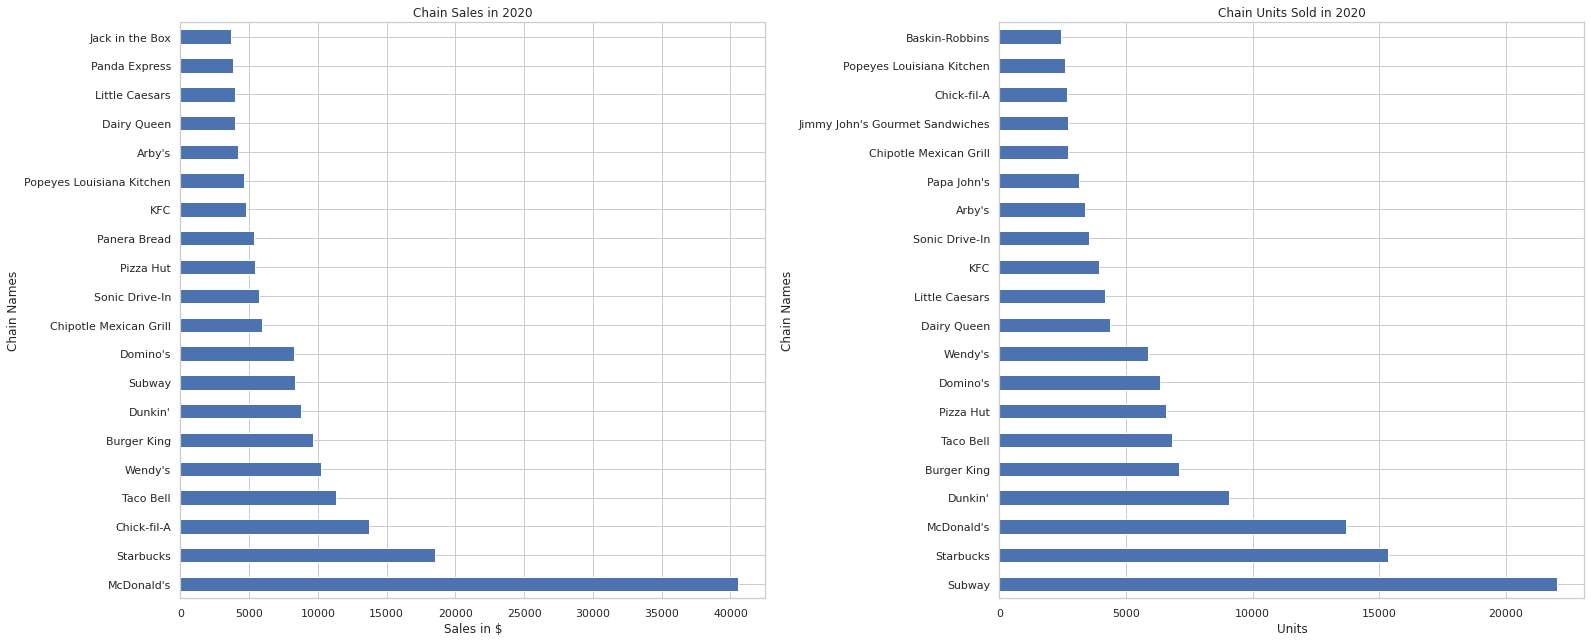

In [ ]:
#@title Leading Restaurants in Sales and Units in 2020

plt.figure(figsize= (20,10))
plt.subplot(1,2,1)
chains.groupby(['CHAIN'])['Sales'].sum().sort_values(ascending=False).head(20).plot(kind = "barh")
plt.ylabel("Chain Names")
plt.xlabel("Sales in $")
plt.title("Chain Sales in 2020")

plt.subplot(1,2,2)
chains.groupby(['CHAIN'])['Units'].sum().sort_values(ascending=False).head(20).plot(kind = "barh")
plt.ylabel("Chain Names")
plt.xlabel("Units")
plt.title("Chain Units Sold in 2020")


plt.subplots_adjust(
                    bottom=0.1,
                    right=1.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



<AxesSubplot:>

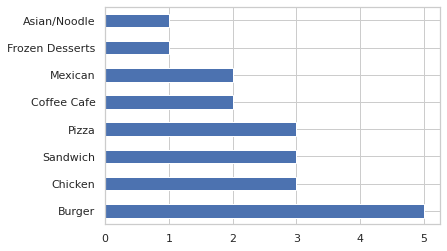

In [ ]:
#@title In best 20 Restaurants Check Items Sold Count
chains.head(20).Menu_Item.value_counts()[:20].plot(kind = 'barh')


<AxesSubplot:title={'center':' Items Sold For the 100 Restuarants '}, xlabel='Number of Restaurants Selling Each Item', ylabel='Item Name'>

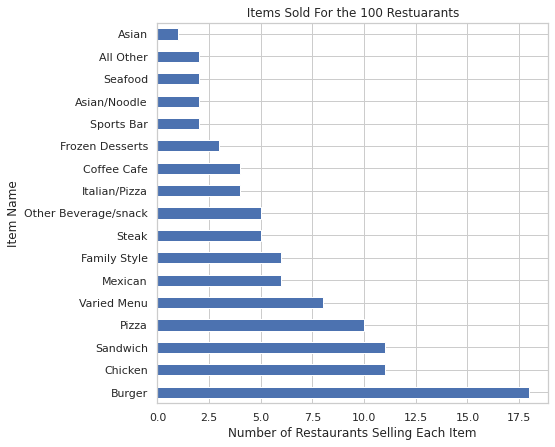

In [ ]:
#@title Count for Every Top Item 
plt.figure(figsize=(7,7))
plt.title(' Items Sold For the 100 Restuarants ')
plt.xlabel("Number of Restaurants Selling Each Item")
plt.ylabel("Item Name")
chains.Menu_Item.value_counts().sort_values(ascending=False)[:20].plot(kind = 'barh')



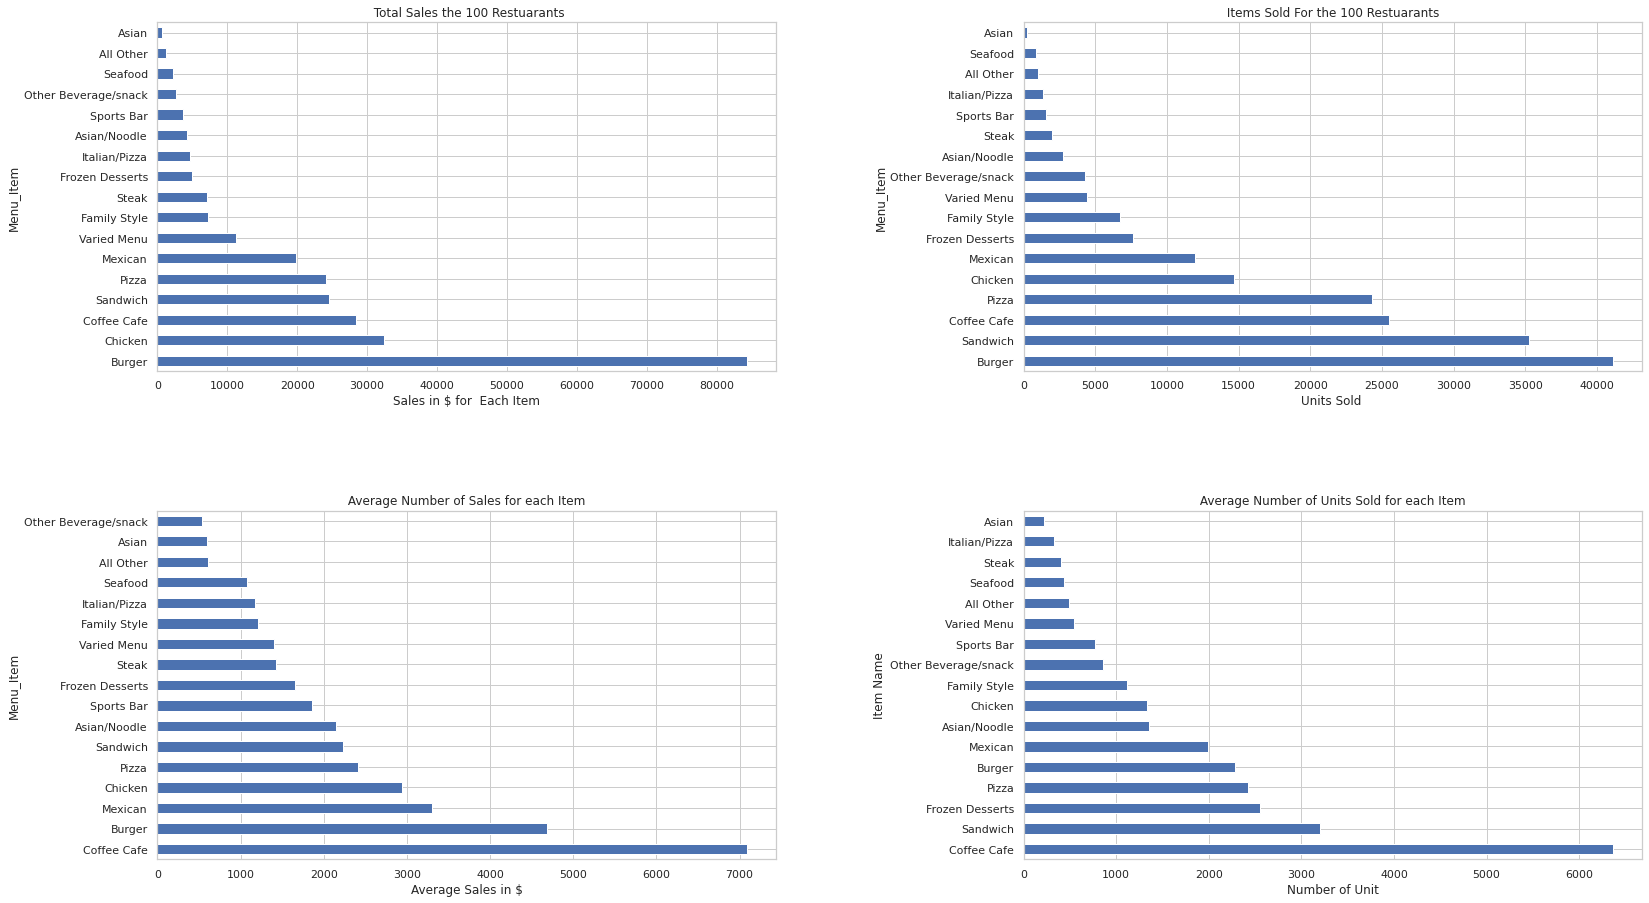

In [ ]:
#@title Each Items Statistcs
plt.figure(figsize= (15,15))

plt.subplot(2,2,1)
plt.title('  Total Sales the 100 Restuarants ')
plt.xlabel("Sales in $ for  Each Item")
plt.ylabel("Item Name")
chains.groupby(['Menu_Item'])['Sales'].sum().sort_values(ascending=False).head(20).plot(kind = "barh")

plt.subplot(2,2,2)
plt.title(' Items Sold For the 100 Restuarants ')
plt.xlabel("Units Sold ")
plt.ylabel("Item Name")
chains.groupby(['Menu_Item'])['Units'].sum().sort_values(ascending=False).head(20).plot(kind = "barh")


plt.subplot(2,2,3)
plt.title(' Average Number of Sales for each Item ')
plt.xlabel("Average Sales in $")
plt.ylabel("Item Name")
chains.groupby(['Menu_Item'])['Sales'].mean().sort_values(ascending=False).head(20).plot(kind = "barh")


plt.subplot(2,2,4)
plt.title(' Average Number of Units Sold for each Item ')
plt.xlabel("Number of Unit")
chains.groupby(['Menu_Item'])['Units'].mean().sort_values(ascending=False).head(20).plot(kind = "barh")
plt.ylabel("Item Name")


plt.subplots_adjust(
                  
                    right=1.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

**-Coffee is Leading the items in average number of units sold and average sales in $ for all items**

**-Study Burger sellers to understand the gap**


Text(0, 0.5, 'Units Sold')

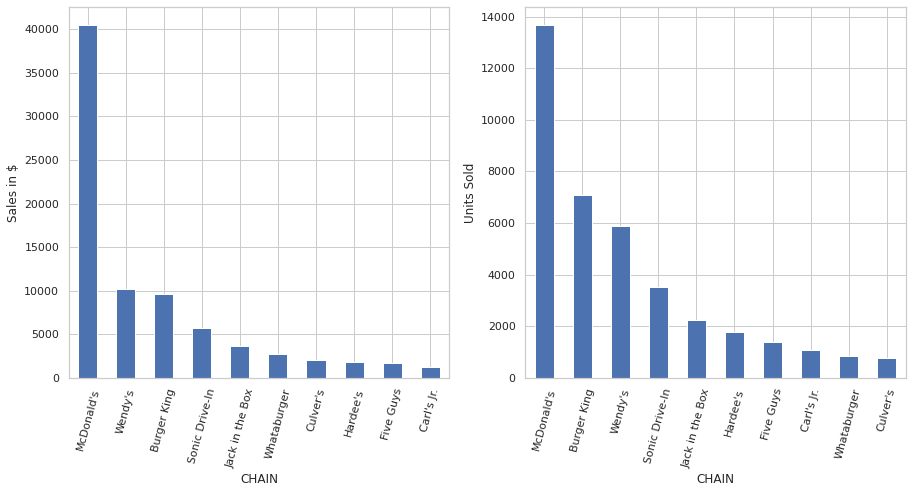

In [ ]:
#@title Study Burger Sellers
plt.figure(figsize= (15,15))
plt.title("Burger Sellers")
plt.subplot(2,2,1)
burger=chains[chains['Menu_Item']=='Burger']
burger.groupby(['CHAIN'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Sales in $")

plt.subplot(2,2,2)
burger.groupby(['CHAIN'])['Units'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Units Sold")



**Mcdonalds is leading both Number of units sold and Sales in $ so that the average units and sales is ruined by the other restaurants due to the outstanding of Mcdonalds**


Text(0, 0.5, 'Units Sold')

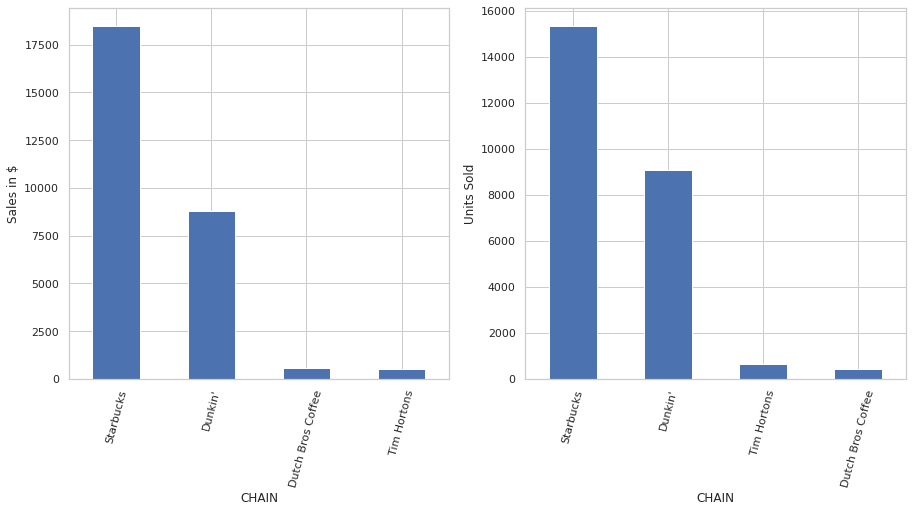

In [ ]:
#@title Study Coffee Sellers
plt.figure(figsize= (15,15))
plt.title("Coffee Sellers")
plt.subplot(2,2,1)
burger=chains[chains['Menu_Item']=='Coffee Cafe']
burger.groupby(['CHAIN'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Sales in $")


plt.subplot(2,2,2)
burger.groupby(['CHAIN'])['Units'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Units Sold")



Text(0, 0.5, 'Units Sold')

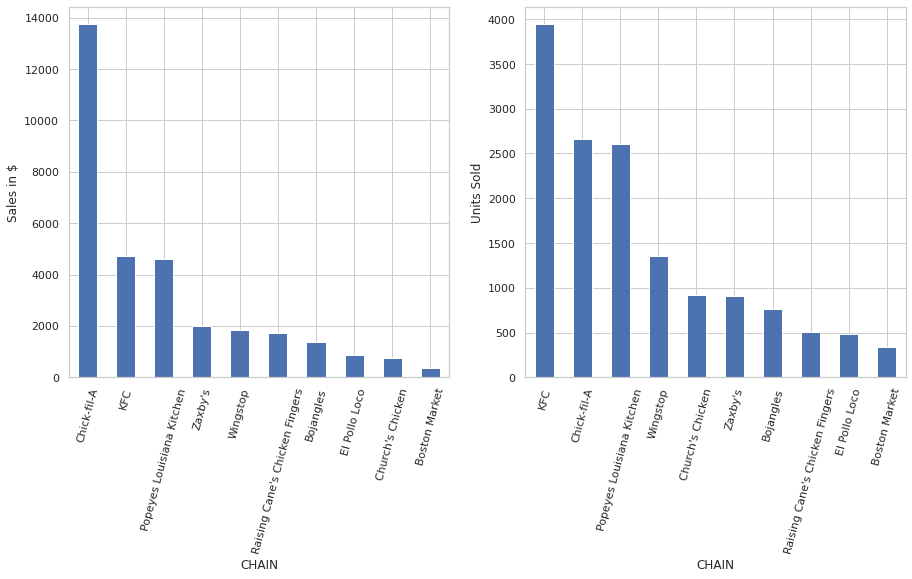

In [ ]:
#@title Study Chicken Sellers
plt.figure(figsize= (15,15))
plt.title("Coffee Sellers")
plt.subplot(2,2,1)
burger=chains[chains['Menu_Item']=='Chicken']
burger.groupby(['CHAIN'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Sales in $")

plt.subplot(2,2,2)
burger.groupby(['CHAIN'])['Units'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Units Sold")



Text(0, 0.5, 'Units Sold')

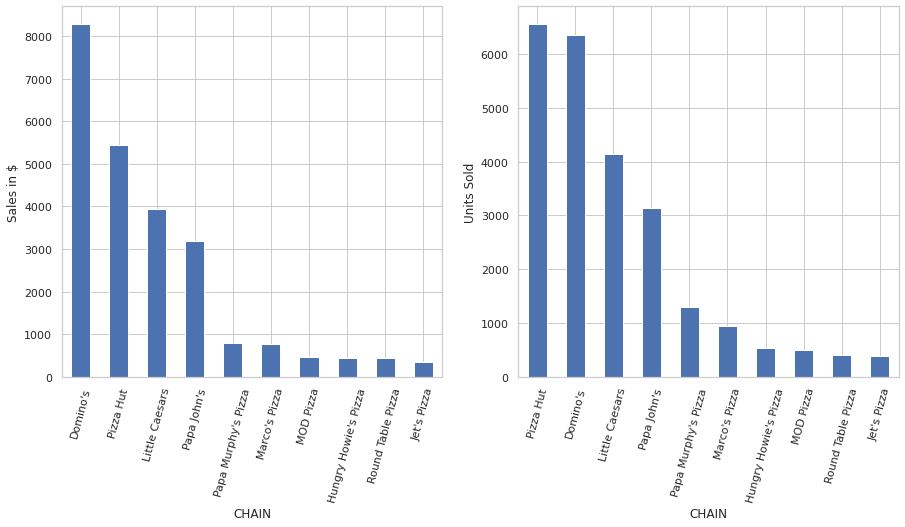

In [ ]:
#@title Study Pizza Sellers
plt.figure(figsize= (15,15))
plt.title("Coffee Sellers")
plt.subplot(2,2,1)
burger=chains[chains['Menu_Item']=='Pizza']
burger.groupby(['CHAIN'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Sales in $")


plt.subplot(2,2,2)
burger.groupby(['CHAIN'])['Units'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
plt.xticks(rotation=75)
plt.ylabel("Units Sold")



<AxesSubplot:>

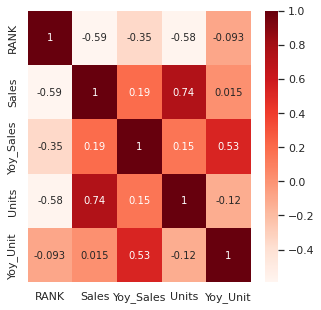

In [ ]:
#@title Correlation Between Features
plt.figure(figsize=(5,5))
cor = chains.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


**For Sure when you sell more , you earn more. That's What the correlation shows above also**

In [ ]:
#@title study segment
chains.columns
chains['SEGMENT'].unique()

array(['Quick Service', 'Fast Casual', 'Casual Dining', 'Midscale',
       'Fine Dining'], dtype=object)

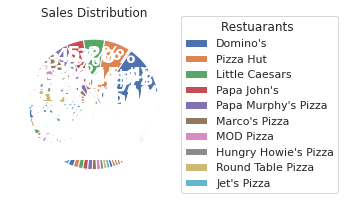

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} $)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(chains['Sales'], autopct=lambda pct: func(pct, chains['Sales']),
                                  textprop   s=dict(color="w"))

ax.legend(wedges, burger['CHAIN'],
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Sales Distribution")

plt.show()